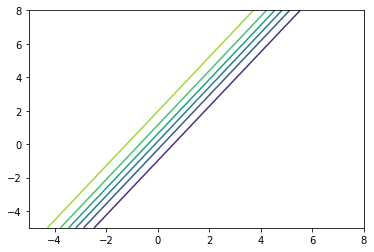

In [43]:
import numpy as np
import matplotlib.pyplot as plt

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])
P1 = 0.5
P2 = 0.5

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 8, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1)
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

X3,Y3,Z3 = posteriorPlot(200, 200, m1, C1, m2, C2, P1, P2)
plt.contour(X3, Y3, Z3)

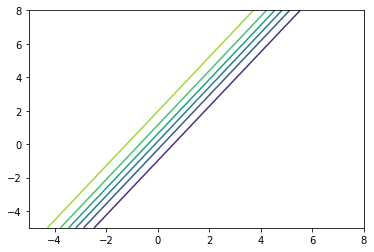

In [51]:
import numpy as np
import matplotlib.pyplot as plt

m1 = np.array([0, 3]
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])
P1 = 0.5
P2 = 0.5

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * math.sqrt(dC)
    return num / den

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 8, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1) 
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

Xp, Yp, Zp = posteriorPlot(200, 200, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp)

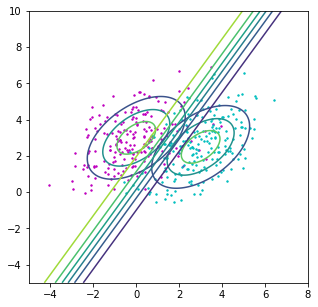

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C = np.array([[2, 1], [1, 2]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1) 
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]])
m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]])
P1 = 0.5
P2 = 0.5

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

X3, Y3, Z3 = posteriorPlot(200, 200, m1, C1, m2, C2, P1, P2)
plt.contour(X3, Y3, Z3)
plt.savefig("Boundary 1.png")

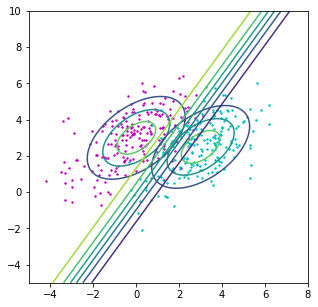

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C = np.array([[2, 1], [1, 2]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1) 
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]])
m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]])
P1 = 0.7
P2 = 0.3

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

X3, Y3, Z3 = posteriorPlot(200, 200, m1, C1, m2, C2, P1, P2)
plt.contour(X3, Y3, Z3)
plt.savefig("Boundary 2.png")

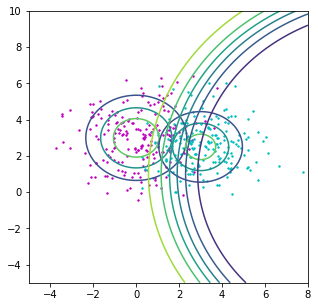

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1.5, 0], [0, 1.5]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A1 = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1) 
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[2, 0], [0, 2]])
m2 = np.array([3, 2.5])
C2 = np.array([[1.5, 0], [0, 1.5]])
P1 = 0.7
P2 = 0.3

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

X3, Y3, Z3 = posteriorPlot(200, 200, m1, C1, m2, C2, P1, P2)
plt.contour(X3, Y3, Z3)
plt.savefig("Boundary 3.png")

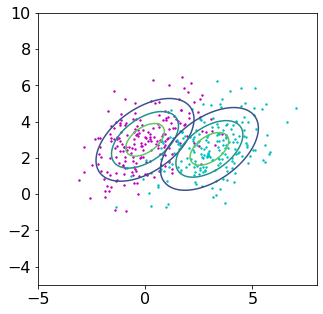

In [225]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C = np.array([[2, 1], [1, 2]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[2, 1], [1, 2]])
m2 = np.array([3, 2.5])
C2 = np.array([[2, 1], [1, 2]])
P1 = 0.5
P2 = 0.5

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.savefig("Boundary 4.png")

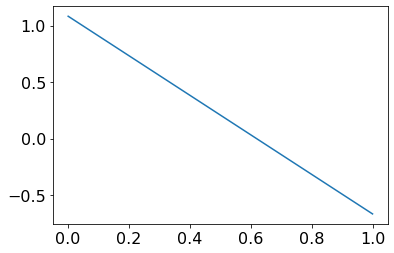

In [229]:
Ci = np.linalg.inv(2*C)
uF = Ci @ (m2 - m1)
yp1 = (U1 @ A.T + m1) @ uF
yp2 = (U2 @ A.T + m2) @ uF

plt.plot(uF)
plt.savefig("Discriminant Direction.png")

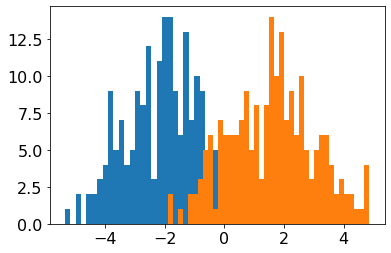

In [230]:
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins = 40)
plt.hist(yp2, bins = 40)
plt.savefig("Histogram of Projections' Distribution.png")
 


-5.346592192354759 4.8631562781734825


-0.9557

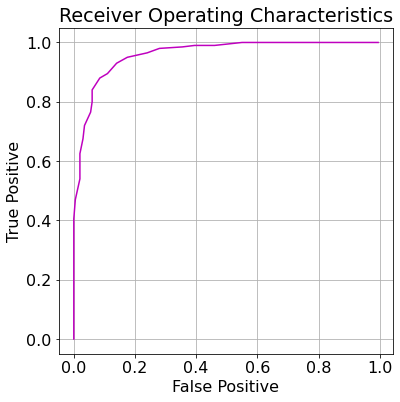

In [231]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh])  / len(yp2)
    FP = len(yp1[yp1 > thresh])  / len(yp1)
    ROC[i,:] = [FP, TP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(ROC[:,0], ROC[:,1], c = 'm')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve1.png')
np.trapz(ROC[:,1], ROC[:,0])

   

In [235]:
#Youden Index
#
TPR = ROC[1,1]
FPR = ROC[1,0]
Threshold = thRange[1]
ACR = (TPR + (1 - FPR)) / 2
print(Threshold)
print(TPR)
print(FPR)
print(ACR)  
for i in range(len(thRange)):
    Sensitivity = ROC[i,1]/100
    Specificity = 1- ROC[i,0]/100
    YoudenIndex[i] = Sensitivity + Specificity -1
    print(YoudenIndex[i])
N =1
a= YoudenIndex[1]
for i in range(len(YoudenIndex)):
    if YoudenIndex[i]>a:
        a = YoudenIndex[i]
        N = i

TPR = ROC[N,1]
FPR = ROC[N,0]
Threshold = thRange[N]
ACR = (TPR + 1 - FPR) / 2
        
print('Best Threshold:', Threshold)
print('Best TPR:', TPR)
print('Best FPR:', FPR)
print('Best Accuracy:', ACR)

-5.138229978670509
1.0
0.995
0.5025
4.999999999988347e-05
4.999999999988347e-05
4.999999999988347e-05
0.00014999999999987246
0.00019999999999997797
0.00034999999999985043
0.0004999999999999449
0.0008500000000000174
0.0011499999999999844
0.0016000000000000458
0.0017499999999999183
0.0021499999999998742
0.0024500000000000632
0.003049999999999997
0.003649999999999931
0.003949999999999898
0.0044999999999999485
0.00529999999999986
0.0059499999999999
0.006299999999999972
0.006999999999999895
0.007249999999999979
0.007749999999999924
0.007900000000000018
0.007849999999999913
0.007949999999999902
0.007800000000000029
0.007399999999999851
0.007099999999999884
0.006850000000000023
0.006450000000000067
0.006050000000000111
0.005850000000000133
0.0052000000000000934
0.004650000000000043
0.004050000000000109
0.0035000000000000586
0.0028999999999999027
0.0025500000000000522
0.0020000000000000018
0.0018499999999999073
0.0014000000000000679
0.0010499999999999954
0.0007999999999999119
0.000699999999999

-2.7898131227402616 11.812480894954597


-0.7820625

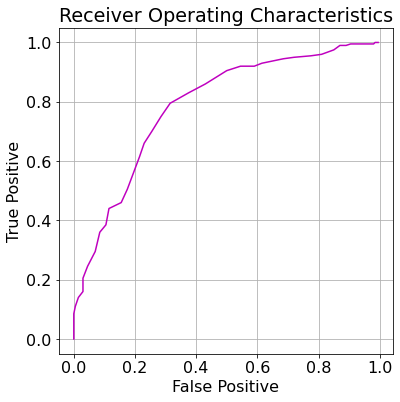

In [237]:
uF = [1,1]
yp1 = (U1 @ A.T + m1) @ uF
yp2 = (U2 @ A.T + m2) @ uF
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh])  / len(yp2)
    FP = len(yp1[yp1 > thresh])  / len(yp1)
    ROC[i,:] = [FP, TP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(ROC[:,0], ROC[:,1], c = 'm')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve2.png')
np.trapz(ROC[:,1],ROC[:,0])


-9.852582755148516 18.708851084345692


-0.9372250000000001

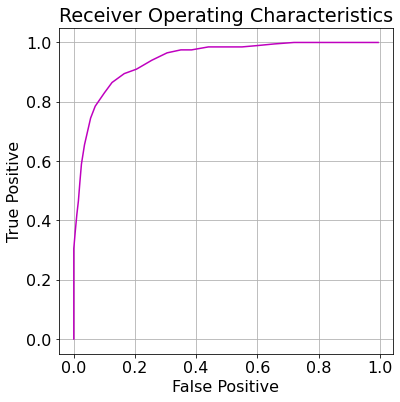

In [238]:
uF = m2 - m1
yp1 = (U1 @ A.T + m1) @ uF
yp2 = (U2 @ A.T + m2) @ uF
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) / len(yp2)
    FP = len(yp1[yp1 > thresh]) / len(yp1)
    ROC[i,:] = [FP, TP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(ROC[:,0], ROC[:,1], c = 'm')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve3.png')
np.trapz(ROC[:,1],ROC[:,0])


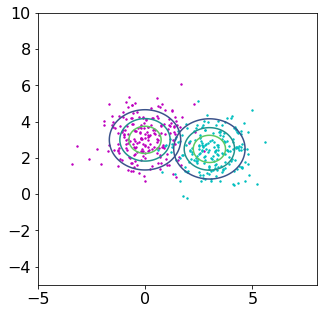

In [239]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 3]]
m2 = [[3, 2.5]]
C = np.array([[1, 0], [0, 1]])
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 10, nx)
    y = np.linspace(-5, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

nx, ny = 200, 200
m1 = np.array([0, 3])
C1 = np.array([[1, 0], [0, 1]])
m2 = np.array([3, 2.5])
C2 = np.array([[1, 0], [0, 1]])
P1 = 0.5
P2 = 0.5

X1, Y1, Z1 = twoDGaussianPlot (nx, ny, m1, C1)
X2, Y2, Z2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
